# Proyek Analisis Data: E-Commerce Dataset
- **Nama:** Filza Rahma Muflihah
- **Email:** filzarahmamuflihah@gmail.com
- **ID Dicoding:** filza_rahma_muflihah

In [ ]:
!python --version

Python 3.10.12


## Menentukan Pertanyaan Bisnis


* Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
* Kategori produk apa yang paling banyak dan paling sedikit terjual?
* Bagaimana kontribusi setiap metode pembayaran terhadap total penjualan?
* Berapa proporsi pesanan yang berhasil dikirim tepat waktu?
* Bagaimana demografi pelanggan yang kita miliki?



## Import Semua Packages/Library yang Digunakan

In [ ]:
# library untuk pemrosesan dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# library untuk mengekstrak file ZIP
import requests
import zipfile
import os

In [ ]:
!pip install gdown

## Data Wrangling

### Gathering Data

In [ ]:
import gdown

file_id = '1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK'
output = "dataset.zip"

# URL dataset
url = f"https://drive.google.com/uc?id={file_id}" # Ganti dengan URL dataset kamu

# Unduh file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=1592dccc-01e3-4d4a-ba58-97840855698f
To: /content/dataset.zip
100%|██████████| 44.9M/44.9M [00:00<00:00, 130MB/s]


'dataset.zip'

In [ ]:
import zipfile

# Nama file ZIP yang diunduh
zip_file = "dataset.zip"

# Ekstrak file ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()  # Folder tujuan
    print("File berhasil diekstrak!")

File berhasil diekstrak!


**1. Dataset Customers**

In [ ]:
customers_df = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Dataset customers memiliki 5 kolom atribut sebagai berikut:

  1. customer_id: key untuk dataset order. Setiap order memiliki customer_id yang unik
  2. customer_unique_id: pengenal unik pelanggan
  3. customer_zip_code_prefix: lima digit pertama kode pos pelanggan
  4. customer_city: nama kota pelanggan
  5. customer_state: negara bagian pelanggan
- Dataset customer berhubungan dengan dataset order melalui atribut customer_id
- Dataset customer berhubungan dengan dataset geolocation melalui geolocation_zip_code_prefix

**2. Dataset Geolocation**

In [ ]:
geolocation_df = pd.read_csv('/content/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Dataset geolocation memiliki 5 atribut sebagai berikut:

  1. geolocation_zip_code_prefix: lima digit pertama kode pos pelanggan
  2. geolocation_lat: latitudinal (titik garis lintang yang sejajar dengan khatulistiwa dan mengukur jarak angular ke utara atau selatan. Latitude biasanya mewakili sumbu Y. )
  3. geolocation_lng: longitudinal (titik garis bujur yang menghubungkan sisi utara dan selatan bumi dan mengukur jarak angular ke timur atau barat)
  4. geolocation_city: nama kota
  5. geolocation_state: nama negara bagian
- Dataset geolocation berhubungan dengan dataset customers melalui geolocation_zip_code_prefix

**3. Dataset Order - Items**

In [ ]:
order_items_df = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Dataset order-items memiliki 7 atribut sebagai berikut:

  1. order_id: pengenal unik order
  2. order_item_id: nomor urut yang mengidentifikasi jumlah item yang termasuk dalam urutan yang sama.
  3. product_id: pengenal unik produk.
  4. seller_id: pengenal unik seller
  5. shipping_limit_date: tanggal batas pengiriman penjual untuk menangani pesanan ke mitra logistik.
  6. price: harga item
  7. freight_value: item nilai pengiriman barang (jika pesanan memiliki lebih dari satu item, nilai pengiriman barang akan dibagi di antara item)

- Dataset order-items berhubungan dengan dataset orders melalui atribut order_id
- Dataset order-items berhubungan dengan dataset product melalui atribut product_id
- Dataset order-items berhubungan dengan dataset seller melalui atribut seller_id

**4. Dataset Order - Payments**

In [ ]:
order_payments_df = pd.read_csv('/content/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Dataset order-payments memiliki 5 kolom atribut sebagai berikut.

  1. order_id: pengenal unik dari suatu pesanan.
  2. payment_sequential: urutan untuk pesanan pelanggan yang membayar dengan lebih dari satu metode pembayaran.  
  3. payment_type: metode pembayaran yang dipilih oleh pelanggan.
  4. payment_installments: jumlah cicilan yang dipilih oleh nasabah.
  5. payment_value: nilai transaksi.
  
- Dataset order-payments berhubungan dengan dataset order melalui atribut order_id.

**5. Dataset Order - Reviews**

In [ ]:
order_reviews_df = pd.read_csv('/content/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Dataset order-reviews memiliki 7 kolom atribut sebagai berikut:
  1. review_id: pengenal unik dari suatu ulasan.
  2. order_id: pengenal unik dari suatu pesanan.
  3. review_score: catatan mulai dari 1 hingga 5 yang diberikan oleh pelanggan pada survei kepuasan.
  4. review_comment_title: judul komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis.
  5. review_comment_message: pesan komentar dari ulasan yang ditinggalkan oleh pelanggan, dalam bahasa Portugis.
  6. review_creation_date: menunjukkan tanggal saat survei kepuasan dikirim ke pelanggan.
  7. review_answer_timestamp: menampilkan cap waktu jawaban survei kepuasan.
- Dataset order-reviews berhubungan dengan dataset orders melalui atribut order_id.

**6. Dataset Orders**

In [ ]:
orders_df = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dataset orders memiliki 8 kolom atribut sebagai berikut:
  1. order_id: pengenal unik dari sebuah pesanan.
  2. customer_id: kunci ke dataset pelanggan. Setiap pesanan memiliki customer_id yang unik.
  3. order_status: referensi ke status pesanan (terkirim, terkirim, dll).
  4. order_purchase_timestamp: menampilkan cap waktu pembelian.
  5. order_approve_at: menampilkan stempel waktu persetujuan pembayaran.
  6. order_delivered_carrier_date: menampilkan stempel waktu pengiriman pesanan. Ketika pesanan tersebut diserahkan ke mitra logistik.
  7. order_delivered_customer_date: Menunjukkan tanggal pengiriman pesanan yang sebenarnya kepada pelanggan.
  8. order_estimated_delivery_date: Menunjukkan perkiraan tanggal pengiriman yang diinformasikan kepada pelanggan pada saat pembelian.
- Dataset orders berhubungan dengan dataset customers melalui atribut customer_id.

**7. Dataset Product Category Name Translation**

In [ ]:
product_category_df = pd.read_csv('/content/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset product category memiliki 2 atribut.
  1. product_category_name: nama kategori dalam bahasa Portugis
  2. product_category_name_english: nama kategori dalam bahasa Inggris
- Dataset product category berhubungan dengan dataset products melalui atribut product_category_name.

**8. Dataset Products**

In [ ]:
products_df = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Dataset products memiliki 9 atribut sebagai berikut:
  1. product_id: pengenal unik dari sebuah produk.
  2. product_category_name: kategori dasar produk, dalam bahasa Portugis.
  3. product_name_lenght: jumlah karakter yang diekstrak dari nama produk.
  4. product_description_lenght: jumlah karakter yang diekstrak dari deskripsi produk.
  5. product_photos_qty: jumlah foto produk yang dipublikasikan
  6. product_weight_g: berat produk diukur dalam gram.
  7. product_length_cm: panjang produk diukur dalam sentimeter.
  8. product_height_cm:	tinggi produk diukur dalam sentimeter.
  9. product_width_cm: lebar produk diukur dalam sentimeter.
- Dataset products berhubungan dengan dataset order-items melalui atribut product_id.
- Datset products berhubungan dengan dataset product category melalui artibut product_category_name.

**9. Dataset Sellers**

In [ ]:
sellers_df = pd.read_csv('/content/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset Sellers memiliki 4 atribut sebagai berikut:
  1. seller_id:
  2. seller_zip_code_prefix:
  3. seller_city:
  4. seller_state:
- Dataset Sellers berhubungan dengan dataset geolocation melalui atribut seller_zip_code_prefix.
- Dataset Sellers berhubungan dengan dataset order-items melalui atribut seller_id.

### Assessing Data

**1. Menilai Data `customers_df`**

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Dataset customers tidak memiliki kesalahan tipe data, missing value, dan data duplikat.
- Tidak ada _action_ yang diperlukan.


**2. Menilai Data `geolocation_df`**

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Dataset geolocation tidak memiliki kesalahan tipe data dan missing value, tetapi terdapat 261.831 data yang duplikat.
- Perlu penanganan untuk data yang duplikat pada tahap *cleaning*.

**3. Menilai Data `order_items_df`**

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Dataset order-items tidak memiliki missing value dan data duplikat, tetapi terdapat kesalahan tipe data pada kolom shipping_limit_date.
- Perlu mengubah tipe data dari object ke datetime.

**4. Menilai Data `order_payments_df`**

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight**:
- Dataset order-payments tidak memiliki kesalahan tipe data, missing value, maupun data duplikat.
- Tidak ada aksi yang perlu dilakukan.

**5. Menilai Data `order_reviews_df`**

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight**:
- Terdapat 87656 data missing value pada kolom review_comment_title dan 58247 pada kolom review_comment_message.
- Perlu dilakukan pengisian missing value pada review_comment_title dengan teks "No title" dan review_comment_message dengan teks "No comment".
- Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp.
- Perlu dilakukan pengubahan tipe data pada kolom review_creation_date dan review_answer_timestamp dari object menjadi datetime.

**6. Menilai Data `orders_df`**

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight**:
- Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
- Terdapat 160, 1783, 2965 missing value pada masing-masing kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date

**7. Menilai Data `product_category_df`**

In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Tnsight**:
- Dataset product category tidak memiliki kesalahan tipe data, missing value, maupun data duplikat.
- Tidak ada aksi yang perlu dilakukan.

**8. Menilai Data `products_df`**

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight**:
- Terdapat 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty dan 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.

**9. Menilai Data `sellers_df`**

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Dataset sellers tidak memiliki kesalahan tipe data, missing value, maupun data duplikat.
- Tidak ada aksi yang perlu dilakukan.

Ringkasan:

|   | Tipe data | Missing value | Duplicate data |
|---|-----------|---------------|----------------|
| customers_df | - | - | - |
| geolocation_df | - | - | Terdapat 261.831 data yang duplikat |
| order_items_df | Terdapat kesalahan tipe data pada kolom shipping_limit_date | - | - |
| order_payments_df | - | - | - |
| order_reviews_df | Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp | Terdapat 87656 data missing value pada kolom review_comment_title dan 58247 pada kolom review_comment_message | - |
| orders_df | Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date | Terdapat 160, 1783, dan 2965 missing value pada masing-masing kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date | - |
| product_category_df | - | - | - |
| products_df | - | Terdapat 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty dan 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm | - |
| sellers_df | - | - | - |

### Cleaning Data

**1. Membersihkan Data `geolocation_df`**

In [ ]:
# Drop duplicates
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Data duplikat pada dataset geolocation_df telah dibersihkan.

**2. Membersihkan Data `order_items_df`**

In [ ]:
# typecast datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Tipe data pada atribut shipping_limit_date sudah diubah ke tipe data datetime.


**3. Membersihkan Data `order_reviews_df`**

In [ ]:
# typecast datetime
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [ ]:
# sebelum handling missing value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# filling missing value
order_reviews_df['review_comment_title'].fillna(value='No title', inplace=True)
order_reviews_df['review_comment_message'].fillna(value='No comment', inplace=True)

<ipython-input-150-3601ecdd9a69>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna(value='No title', inplace=True)
<ipython-input-150-3601ecdd9a69>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# setelah handling missing value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Tipe data pada atribut review_creation_date dan review_answer_timestamp sudah diubah menjadi datetime.
- Mengisi missing value dengan 'No title' pada atribut review_comment_title dan 'No comment' pada atribut review_comment_message.

**4. Membersihkan Data `orders_df`**

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# typecast datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
# handling missing value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
orders_df[orders_df['order_approved_at'].isna() | orders_df['order_delivered_carrier_date'].isna() | orders_df['order_delivered_customer_date'].isna()]['order_status'].value_counts()

,count
order_status,
shipped,1107
canceled,619
unavailable,609
invoiced,314
processing,301
delivered,23
created,5
approved,2


**Insight:**
- Tipe data pada atribut order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date diubah menjadi tipe data datetime.
- Data yang memiliki missing value adalah order yang memiliki status selain *delivered* sehingga missing value tidak diisi.

**5. Membersihkan Data `products_df`**

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Mengisi missing value pada product_category_name dengan kata 'lainnya' dalam bahasa Portugis
products_df['product_category_name'].fillna(value='outras', inplace=True)

<ipython-input-158-592b4f8c8623>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(value='outras', inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# menampilkan data yang memiliki missing value
products_df[products_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,outras,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,outras,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,outras,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,outras,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,outras,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,outras,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,outras,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,outras,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,outras,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
# Mengetahui persentase banyaknya missing value pada tiap atribut
missing_percentage = (products_df.isna().sum()/len(products_df)) * 100
missing_percentage

,0
product_id,0.000000
product_category_name,0.000000
product_name_lenght,1.851234
product_description_lenght,1.851234
product_photos_qty,1.851234
product_weight_g,0.006070
product_length_cm,0.006070
product_height_cm,0.006070
product_width_cm,0.006070


In [ ]:
# histogram sebelum penanganan missing value
float_columns = products_df.select_dtypes(include=['float64']).columns
float_columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

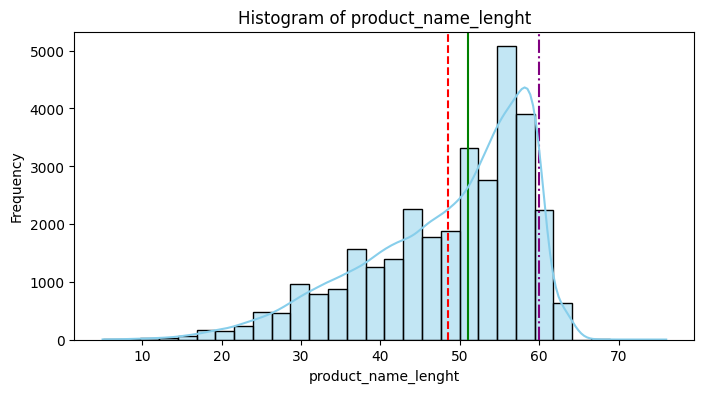

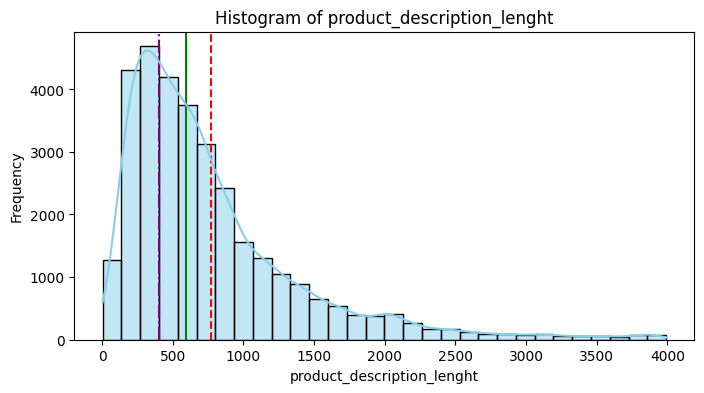

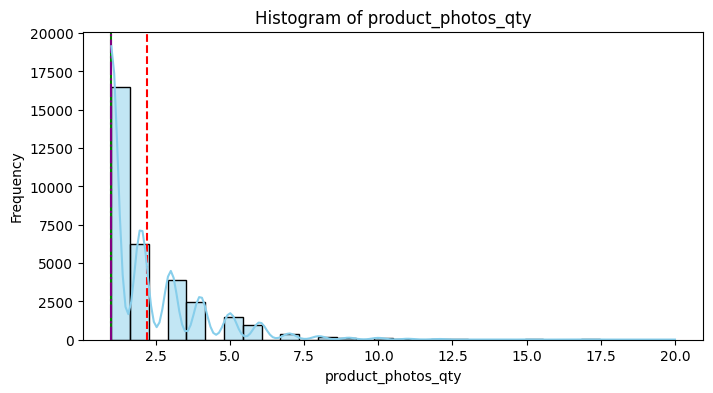

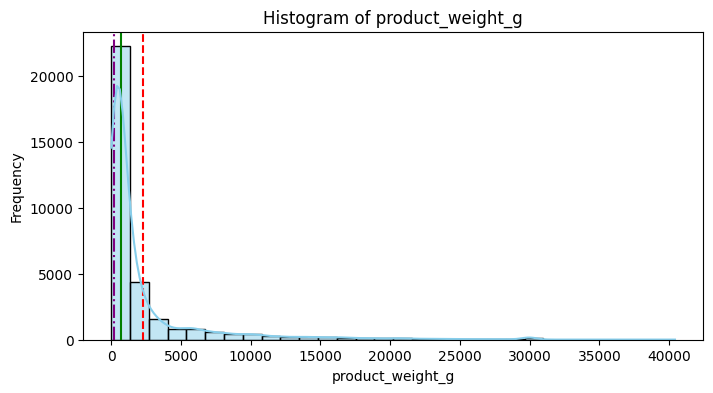

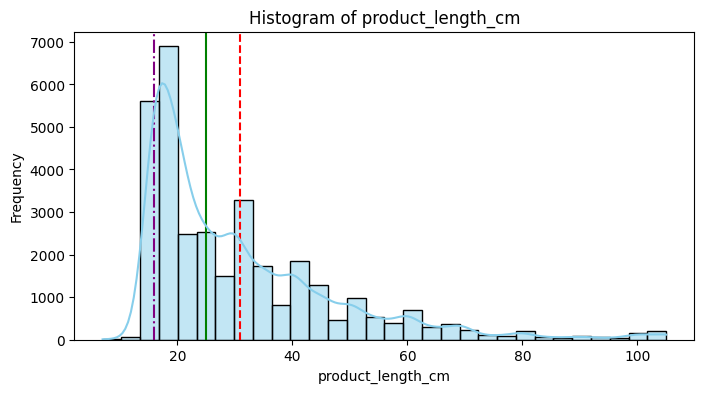

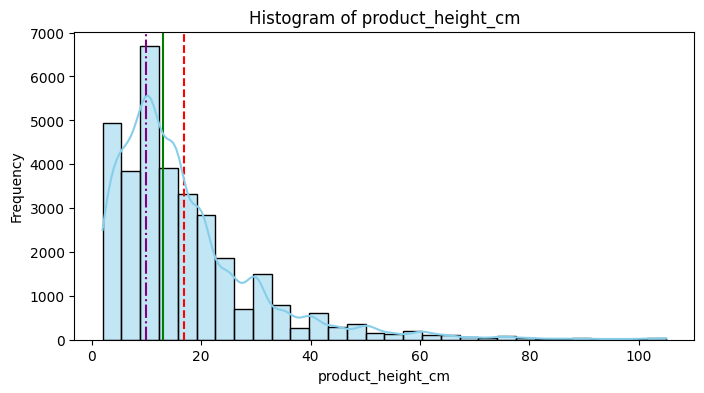

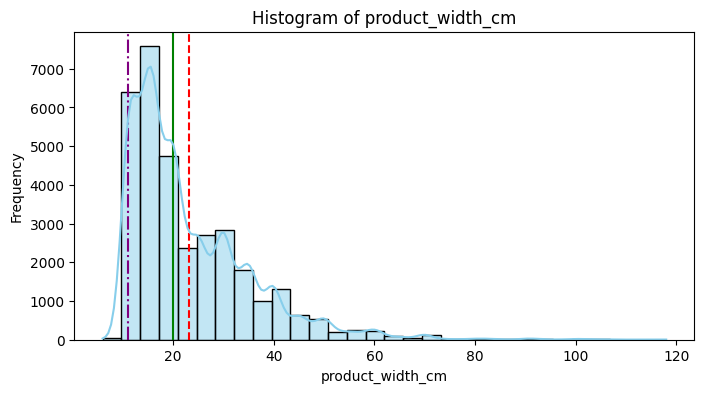

In [ ]:
for col in float_columns:
    plt.figure(figsize=(8, 4))

    mean_value = products_df[col].mean()
    median_value = products_df[col].median()
    mode_value = products_df[col].mode()[0]

    # Tambahkan garis vertikal
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    plt.axvline(mode_value, color='purple', linestyle='-.', label=f'Mode: {mode_value:.2f}')

    sns.histplot(products_df[col], kde=True, bins=30, color='skyblue')

    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Mengisi missing value dengan nilai median
for col in products_df.columns:
  if products_df[col].dtype == 'float64':
    products_df[col].fillna(products_df[col].median(), inplace=True)

products_df.isna().sum()

<ipython-input-164-7878e69f6650>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[col].fillna(products_df[col].median(), inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


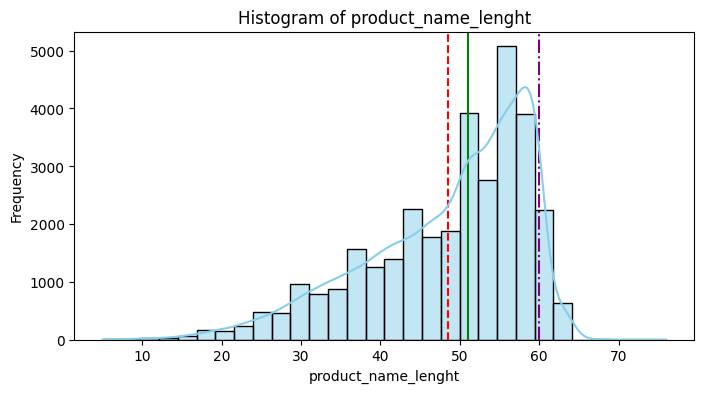

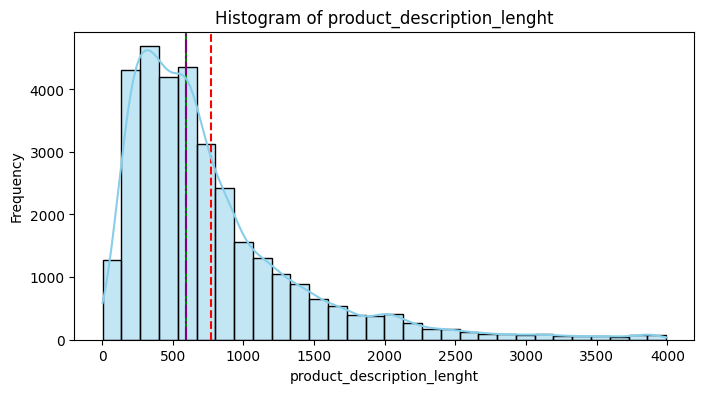

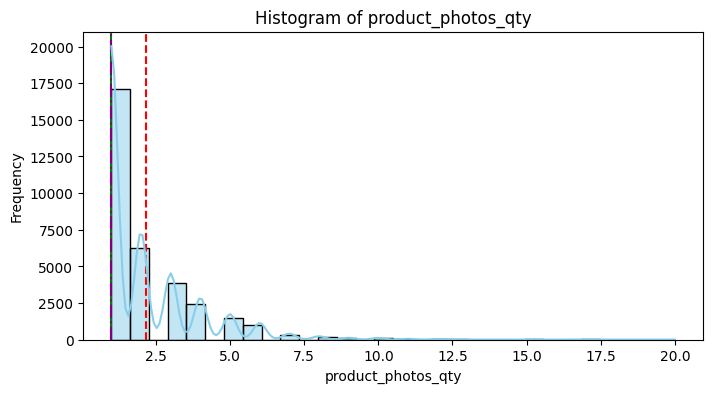

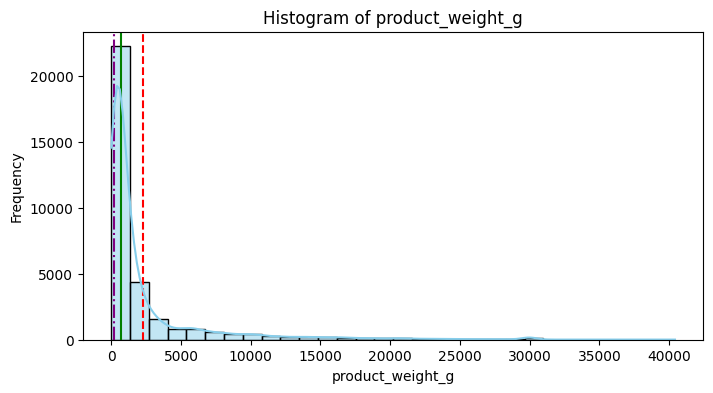

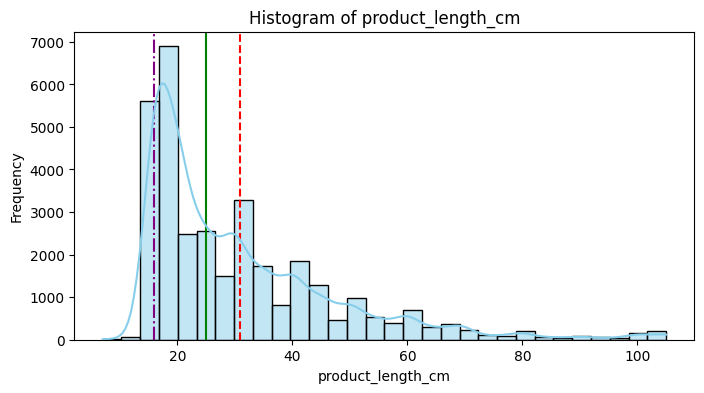

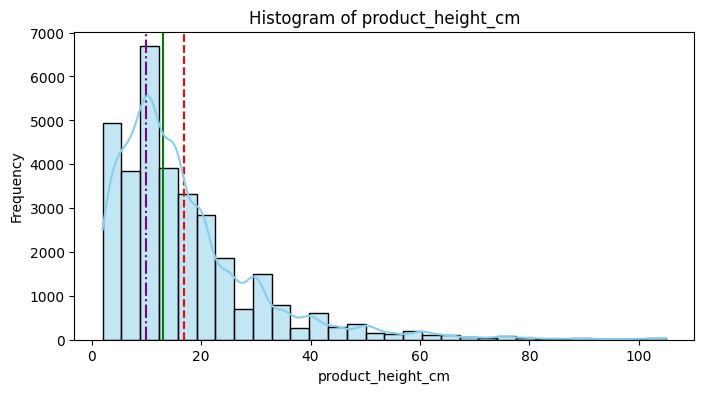

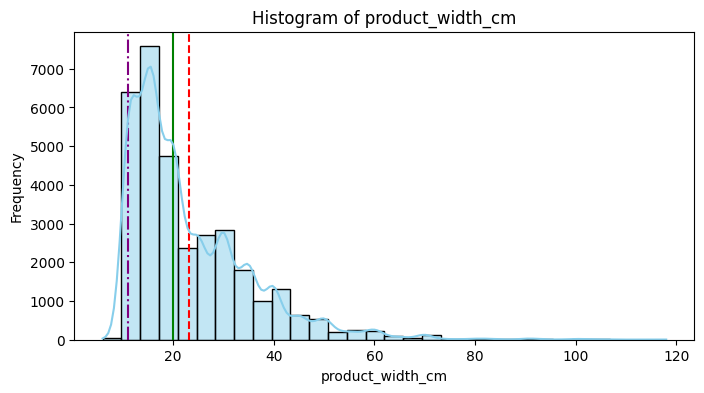

In [ ]:
# histogram setelah penanganan missing value
for col in float_columns:
    plt.figure(figsize=(8, 4))

    mean_value = products_df[col].mean()
    median_value = products_df[col].median()
    mode_value = products_df[col].mode()[0]

    # Tambahkan garis vertikal
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    plt.axvline(mode_value, color='purple', linestyle='-.', label=f'Mode: {mode_value:.2f}')

    sns.histplot(products_df[col], kde=True, bins=30, color='skyblue')

    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# hasil cleaning
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- Missing value pada atribut product_category_name diisi dengan kata 'lainnya' dalam bahasa Portugis yaitu 'outras'.
- Sedangkan untuk missing value pada atribut yang memiliki tipe data float64 tidak didrop karena persentase missing value relatif kecil sehingga diisi dengan nilai median.

## Exploratory Data Analysis (EDA)

**1. Explore `products_df`**

In [ ]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
23595,49910aa68623da9f1bac8754b38f23f7,moveis_decoracao,37.0,142.0,1.0,350.0,30.0,31.0,20.0
31900,e2aa433aedb3d633cea92d4fe212cb96,beleza_saude,25.0,1332.0,1.0,3175.0,25.0,23.0,26.0
16018,1cd876bcbd0907f49bbf28372f86dd32,beleza_saude,36.0,1529.0,1.0,150.0,16.0,5.0,11.0
2521,3dabf82e264128dda5088dc804e09cc8,cool_stuff,52.0,692.0,4.0,450.0,30.0,9.0,30.0
32190,6773d02aae1c902e98b3270fe94d789f,perfumaria,34.0,1011.0,1.0,150.0,16.0,2.0,16.0


In [ ]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [ ]:
products_df['product_id'].is_unique # id product unik

True

Kode sebelumnya memastikan tidak ada value yang tidak akurat pada dataframe dan product_id berisi nilai yang unik. Selanjutnya kita gabung dataframe products_df dan product_category_df.

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Dataframe `products_df` memiliki data yang lebih banyak dibanding `product_category_df`. Oleh karena itu, kedua digabung dengan metode LEFT JOIN pada `products_df`.

In [ ]:
# menggabungkan dataframe product_category_df pada products_df karena products_df memiliki panjang dataframe yang lebih besar
product_merged_df = pd.merge(
    products_df, product_category_df,
    on = 'product_category_name',
    how = 'left'
)

product_merged_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [ ]:
product_merged_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
product_category_name_english,623


In [ ]:
# melihat produk yang memiliki product_category_name tidak kosong, namun product_category_name_english berisi null
product_merged_df[product_merged_df['product_category_name'].notnull() & product_merged_df['product_category_name_english'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,outras,51.0,595.0,1.0,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,outras,51.0,595.0,1.0,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,outras,51.0,595.0,1.0,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,outras,51.0,595.0,1.0,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,outras,51.0,595.0,1.0,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,outras,51.0,595.0,1.0,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,outras,51.0,595.0,1.0,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,outras,51.0,595.0,1.0,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,outras,51.0,595.0,1.0,1300.0,45.0,16.0,45.0,NaN


Dataframe hasil penggabungan memiliki missing value sebanyak 623 pada atribut product_category_name_english seperti yang ditampilkan pada kode sebelumnya. Sebelum melakukan penanganan pada missing value, kita lihat dulu kategori produk apa saja yang memiliki missing value pada bahasa inggrisnya.

In [ ]:
# melihat category apa saja yang memiliki product_category_name tidak kosong, namun product_category_name_english berisi null
product_merged_df[product_merged_df['product_category_name'].notnull() & product_merged_df['product_category_name_english'].isna()]['product_category_name'].unique()

array(['outras', 'pc_gamer',
       'portateis_cozinha_e_preparadores_de_alimentos'], dtype=object)

Terdapat tiga kategori yang tidak terdaftar pada `product_category_df`, yaitu outras, pc_gamer, dan portateis_cozinha_e_preparadores_de_alimentos. Langkah selanjutnya adalah mengisi missing value dengan translasi nama kategori versi inggrisnya.

In [ ]:
# mengisi product_category_name_english
product_merged_df.loc[product_merged_df['product_category_name'] == 'outras', 'product_category_name_english'] = 'other'
product_merged_df.loc[product_merged_df['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'gaming_pc'
product_merged_df.loc[product_merged_df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_food_preparers'

In [ ]:
product = list(product_merged_df['product_category_name_english'].unique())
product.sort()
print("list kategori produk:")
product

list kategori produk:


['agro_industry_and_commerce',
 'air_conditioning',
 'art',
 'arts_and_craftmanship',
 'audio',
 'auto',
 'baby',
 'bed_bath_table',
 'books_general_interest',
 'books_imported',
 'books_technical',
 'cds_dvds_musicals',
 'christmas_supplies',
 'cine_photo',
 'computers',
 'computers_accessories',
 'consoles_games',
 'construction_tools_construction',
 'construction_tools_lights',
 'construction_tools_safety',
 'cool_stuff',
 'costruction_tools_garden',
 'costruction_tools_tools',
 'diapers_and_hygiene',
 'drinks',
 'dvds_blu_ray',
 'electronics',
 'fashio_female_clothing',
 'fashion_bags_accessories',
 'fashion_childrens_clothes',
 'fashion_male_clothing',
 'fashion_shoes',
 'fashion_sport',
 'fashion_underwear_beach',
 'fixed_telephony',
 'flowers',
 'food',
 'food_drink',
 'furniture_bedroom',
 'furniture_decor',
 'furniture_living_room',
 'furniture_mattress_and_upholstery',
 'gaming_pc',
 'garden_tools',
 'health_beauty',
 'home_appliances',
 'home_appliances_2',
 'home_comfort_2'

In [ ]:
print("banyaknya kategori produk:", len(product_merged_df['product_category_name_english'].unique()))

banyaknya kategori produk: 74


In [ ]:
# Mengganti underscore menjadi spasi dan kapitalisasi huruf pertama setiap kata
product_merged_df['product_category_name'] = product_merged_df['product_category_name'].str.replace('_', ' ')
product_merged_df['product_category_name_english'] = product_merged_df['product_category_name_english'].str.replace('_', ' ')

In [ ]:
# menghitung banyak produk pada setiap kategori
product_merged_df.groupby('product_category_name_english').product_id.count().sort_values(ascending=False)

,product_id
product_category_name_english,
bed bath table,3029
sports leisure,2867
furniture decor,2657
health beauty,2444
housewares,2335
...,...
home comfort 2,5
fashion childrens clothes,5
gaming pc,3


Berdasarkan tabel di atas, kategori yang memiliki produk paling banyak adalah Bed Bath Table dan yang paling sedikit adalah Cds Vds Musicals.

**2. Explore `customer_df`**

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# melihat banyaknya customer dari masing-masing kota
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Mayoritas customer berasal dari kota Sao Paolo. Kota kedua paling banyak adalah Rio De Janiero. Lalu disusul dengan kota Belo Horizonte.

In [ ]:
# melihat banyaknya customer dari masing-masing negara bagian
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Data customer memiliki asal negara bagian paling banyak dari SP (São Paulo). Negara kedua paling banyak adalah RJ (Rio de Janeiro). Lalu disusul dengan negara MG (Minas Gerais).

**3. Explore `sellers_df`**

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# melihat top 10 seller terbanyak menurut kota
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


Mayoritas seller berasal dari kota Sao Paolo. Asal kota kedua paling banyak adalah Curitiba. Lalu disusul dengan kota Rio De Janeiro.

In [ ]:
# melihat top 10 seller berdasarkan negara
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Sebagian besar penjual berasal dari negara bagian SP (São Paulo) dengan jumlah penjual mencapai 1.849. Ini menunjukkan bahwa SP merupakan pusat aktivitas e-commerce terbesar dalam dataset ini. Selisih antara jumlah penjual di SP dengan negara bagian kedua terbesar, yaitu PR (Paraná) sebanyak 349 penjual lalu disusul oleh MG (Minas Gerais).

**4. Explore `orders_df`**

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
35649,c68ea4392f5b47e1dd1623a6d9af8f20,1466807c460a633a141042faed40b5a6,delivered,2017-09-15 09:57:51,2017-09-15 10:15:28,2017-09-21 14:04:17,2017-10-02 16:58:17,2017-10-13
64943,bcd050a34214fa492826f945e3425650,b70f1d9626c60f9f1dd1e0ecf94c7c13,shipped,2017-12-06 22:28:19,2017-12-06 22:35:23,2017-12-08 21:59:43,NaT,2018-01-03
97713,d178d8bdd78765955d2260fc1d639052,5b5f4957a69d537a2aeadfa7dd2d09d9,delivered,2017-06-23 22:56:47,2017-06-23 23:05:20,2017-06-27 10:33:13,2017-07-06 12:47:40,2017-07-21
25754,7e601e1373744c3c2572bb0877caac87,afab37ef329763c37b47f6efa67f2b8f,delivered,2017-11-27 13:26:57,2017-11-27 13:39:30,2017-11-28 18:12:38,2017-12-28 13:09:35,2017-12-22
6309,40397c42ea8f390af9afe9cc02cb2fdd,3ac8d3d63db74e05b7d046b8bd284487,delivered,2017-04-03 21:49:28,2017-04-03 22:02:53,2017-04-04 15:20:18,2017-04-28 13:05:30,2017-05-10


In [ ]:
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Sebagian besar pesanan (97%) berhasil terkirim dengan status delivered, menunjukkan kinerja pemrosesan dan pengiriman yang efisien. Pesanan yang dibatalkan (canceled) dan tidak tersedia (unavailable) masing-masing mencatat jumlah kecil, yaitu 625 dan 609, mencerminkan tantangan kecil dalam manajemen stok dan kepuasan pelanggan. Status lainnya, seperti shipped, invoiced, dan processing, menunjukkan sebagian kecil pesanan yang masih dalam proses penyelesaian.

In [ ]:
on_time_delivery = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']
on_time_delivery = on_time_delivery.apply(lambda x: x.total_seconds())
orders_df['on_time_delivery'] = round(on_time_delivery/86400)

orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,on_time_delivery
94686,2f609f51e21add184869268ce7e16048,97923f8039a8e507b87d33d7f77f2f55,delivered,2018-03-07 19:01:38,2018-03-08 13:50:28,2018-03-09 18:58:46,2018-03-15 18:26:28,2018-03-19,3.0
52854,68cf1c197f0444a28730011879182f7a,79ae30e29d8be7c88da3d742493b835d,delivered,2018-02-12 15:03:10,2018-02-12 15:15:21,2018-02-22 03:09:22,2018-04-05 00:22:14,2018-03-08,-28.0
72050,897846300466b8aa40902abef9250b14,685cff88e4e6a56deae11154a25f4d94,delivered,2018-06-18 12:51:14,2018-06-18 13:16:39,2018-06-18 19:16:00,2018-06-20 20:59:25,2018-06-29,8.0
20557,ecd1661658d34312cf9ac2bf34ba3b6b,bcec3938d91ba9a3bf2c4261a44cb9f3,delivered,2018-06-30 18:49:36,2018-07-05 16:25:45,2018-07-03 11:46:00,2018-07-05 12:58:37,2018-07-30,24.0
35668,3e7d62de8eab0ea8d37a2983df8f7af9,9840175c487cbad0c849d9e76c898afc,delivered,2017-10-09 13:40:58,2017-10-10 06:34:12,2017-10-11 17:38:57,2017-10-16 21:48:45,2017-10-31,14.0


**5. Explore `order_items_df`**

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
order_items_df[order_items_df['order_id'] == 'a483ffe0ce133740ab12ebcba8a3ccf9']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
72121,a483ffe0ce133740ab12ebcba8a3ccf9,1,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72122,a483ffe0ce133740ab12ebcba8a3ccf9,2,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72123,a483ffe0ce133740ab12ebcba8a3ccf9,3,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72124,a483ffe0ce133740ab12ebcba8a3ccf9,4,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72125,a483ffe0ce133740ab12ebcba8a3ccf9,5,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72126,a483ffe0ce133740ab12ebcba8a3ccf9,6,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72127,a483ffe0ce133740ab12ebcba8a3ccf9,7,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72128,a483ffe0ce133740ab12ebcba8a3ccf9,8,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72129,a483ffe0ce133740ab12ebcba8a3ccf9,9,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11
72130,a483ffe0ce133740ab12ebcba8a3ccf9,10,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 14:29:14,109.89,13.11


In [ ]:
order_items_df['shipping_month'] = order_items_df['shipping_limit_date'].dt.to_period('M')
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month
36274,523f7d5ee2ea5775addb6d622b17f92b,1,a50acd33ba7a8da8e9db65094fa990a4,8581055ce74af1daba164fdbd55a40de,2017-11-07 17:07:51,117.30,25.66,2017-11
76248,ad9d242e1b6aefaa8945ca684dfe813d,1,577c6116dcce6a33261911b5225ac475,7142540dd4c91e2237acb7e911c4eba2,2018-07-10 18:31:33,429.90,36.77,2018-07
76734,aeaf2bf4d5560c9cb99fa0d61adc0ae0,1,c511bbd742df73d5b2ba4594d4901f2b,a4bd6e9adf39b63f43dc545d3ca1f53d,2017-06-16 12:32:01,299.99,18.35,2017-06
61,0025c5d1a8ca53a240ec2634bb4492ea,1,35537536ed2b4c561b4018bf3abf54e0,955fee9216a65b617aa5c0531780ce60,2018-07-10 09:30:09,390.00,29.39,2018-07
38548,5790dbdc91eb7734cb388aff90dae5ec,1,beb8e018882d56635b77f4a73233c847,86ccac0b835037332a596a33b6949ee1,2017-07-06 04:55:28,53.00,15.12,2017-07


In [ ]:
# Hitung Jumlah Produk yang Diserahkan ke Logistik
monthly_shipping = order_items_df.groupby('shipping_month')['product_id'].count().reset_index()
monthly_shipping.rename(columns={'product_id': 'total_orders'}, inplace=True)
monthly_shipping

,shipping_month,total_orders
0,2016-09,4
1,2016-10,365
2,2016-12,1
3,2017-01,681
4,2017-02,1866
5,2017-03,2751
6,2017-04,2364
7,2017-05,4150
8,2017-06,3801
9,2017-07,4116


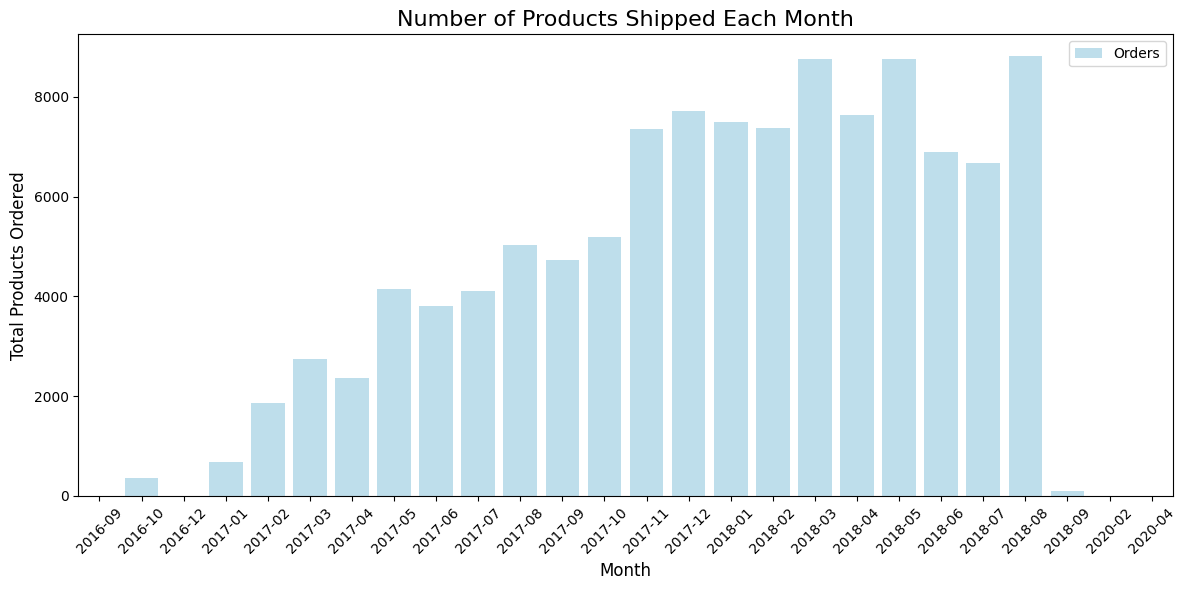

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='shipping_month', y='total_orders', data=monthly_shipping, alpha=0.6, color='skyblue', label='Orders')

plt.title('Number of Products Shipped Each Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Products Ordered', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Jumlah total produk yang dikirim setiap bulan mengalami fluktuasi yang signifikan. Secara umum, terlihat adanya tren peningkatan jumlah produk yang dikirim dari tahun 2017 hingga 2018. Puncak dari pengiriman produk terjadi pada bulan Agustus tahun 2018 sebanyak 8815 item.

**6. Explore `order_payments_df`**

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
38726,daf946e879dab6e7e6b3f968297c3fe3,1,credit_card,5,56.78
62687,62c509fe3a2bc8c153ddb5c4b3d8abd8,1,credit_card,2,148.88
89431,c85f30d2bcd5e2a640f2c99024171998,1,credit_card,1,65.01
95365,b293f468141dc24b16033560c8d008a6,2,voucher,1,15.08
72152,a2ff044ec5d43bc7a284932e85a15049,1,credit_card,2,74.97


In [ ]:
order_payments_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


Berdasarkan tabel di atas, mayoritas pelanggan menggunakan jenis pembayaran kartu kredit, boleto, dan voucher.

In [ ]:
order_payments_df.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': ['min', 'mean', 'max', 'sum']
})

order_id payment_value                                   
              nunique           min        mean       max          sum
payment_type                                                          
boleto          19784         11.62  145.034435   7274.88   2869361.27
credit_card     76505          0.01  163.319021  13664.08  12542084.19
debit_card       1528         13.38  142.570170   4445.50    217989.79
not_defined         3          0.00    0.000000      0.00         0.00
voucher          3866          0.00   65.703354   3184.34    379436.87

Setiap jenis pembayaran memiliki nilai pembayaran yang berbeda. Rata-rata paling tinggi berada pada katu kredit, lalu disusul boleto, dan kartu debit.

**7. Explore `order_reviews_df`**

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
review_time = order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date']
review_time = review_time.apply(lambda x: x.total_seconds())
order_reviews_df['review_time'] = round(review_time/86400)

order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
27561,b0b504f8f46a8743d021a3c14082ac41,2c007d9ae26859112a7d67f993163e5a,5,No title,No comment,2017-11-18,2017-11-18 19:20:09,1.0
18606,1af7d746c0c95e0e4c03586cbb790ca8,dfda6b8e30bc9ac258d2835f931c28f0,5,No title,"loja muito responsavel,entrega muito rapido an...",2018-01-19,2018-01-22 10:47:36,3.0
54395,3c2ac94d47b4ba58f5cd690fdca72649,f62bd55133b35f243bfa088d581b4e4b,4,9 pra esse pedido,Ótimo produto..lindo,2018-07-04,2018-07-05 02:01:49,1.0
67535,da642960eb2217a2589a0dd555401da4,c62449227473f63a96e42cec192ec143,1,No title,Já é a segunda compra que não recebo.,2018-01-07,2018-01-07 14:17:30,1.0
35518,4e98f51633291ccd222aa9fac9b16bd2,f15ee2f37da0500e278ec213c201edf3,5,No title,No comment,2018-08-04,2018-08-05 11:24:29,1.0


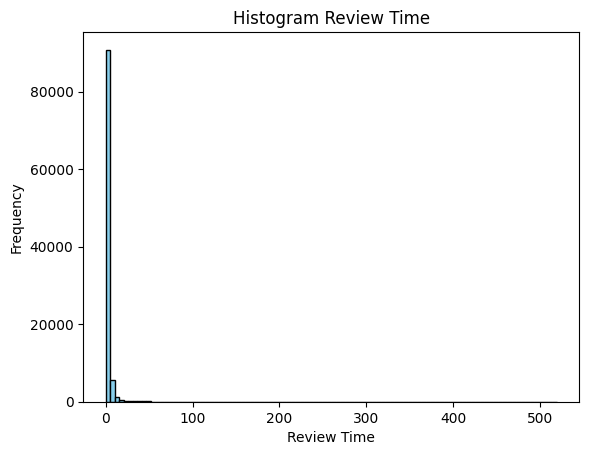

In [ ]:
# Membuat histogram untuk kolom 'nilai'
plt.hist(order_reviews_df['review_time'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram Review Time')
plt.xlabel('Review Time')
plt.ylabel('Frequency')
plt.show()

Lamanya waktu ulasan beragam di mulai dari 0 hari hingga 519 hari.

In [ ]:
score_counts = order_reviews_df['review_score'].value_counts().sort_values(ascending=False).reset_index()
score_counts.columns = ['Review Score', 'Count']
score_counts

,Review Score,Count
0,5,57328
1,4,19142
2,1,11424
3,3,8179
4,2,3151


<ipython-input-203-0a50fdc6b1be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts['Review Score'],


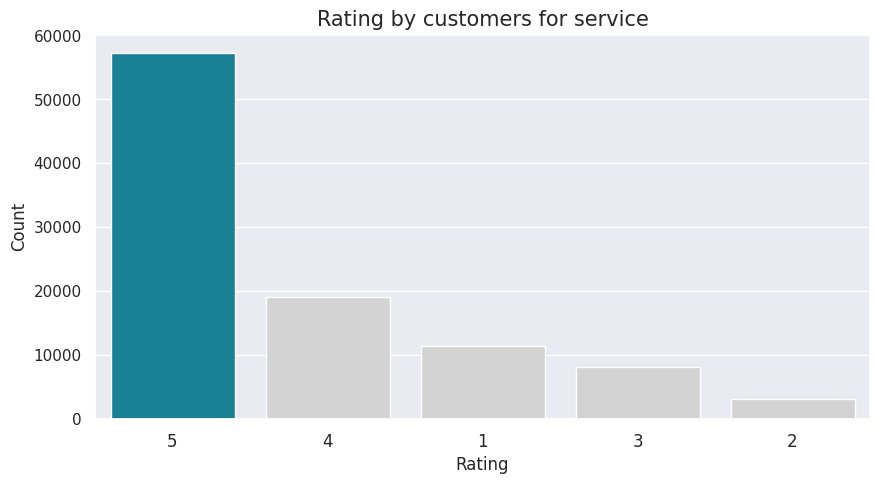

In [ ]:
most_common_score = score_counts['Review Score'].max()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=score_counts['Review Score'],
            y=score_counts['Count'],
            order=score_counts['Review Score'],
            palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in score_counts['Review Score']]
            )

plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

Grafik menunjukkan bahwa mayoritas customer sangat puas dengan layanan pesanan, terbukti dengan banyaknya customer yang meberikan rating 5 memiliki data terbanyak daripada rating yang lainnya.

**8. Explore all dataframes**

In [ ]:
# merge orders_df & order_items_df
all_df = pd.merge(
    order_items_df, orders_df,
    on = 'order_id',
    how = 'left'
)
all_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,on_time_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,13.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,5.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,15.0


In [ ]:
# merge all_df & order_payments_df
all_df = pd.merge(
    all_df, order_payments_df,
    on = 'order_id',
    how = 'left'
)
all_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,on_time_delivery,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2.0,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,13.0,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,5.0,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,15.0,1.0,credit_card,3.0,218.04


In [ ]:
# membandingkan price dan payment_value untuk order dengan item > 1
all_df[all_df['order_item_id'] > 1][['price', 'payment_value']]

,price,payment_value
14,49.90,126.54
33,21.33,109.29
34,21.33,109.29
44,24.89,127.56
45,24.89,127.56
...,...,...
117571,21.90,113.07
117589,180.00,456.28
117595,55.00,356.76
117596,55.00,356.76


Tampak pada hasil di atas bahwa price adalah harga untuk 1 item, sedangkan payment_value adalah nilai yang dibayar oleh customer setiap 1 order. 1 order bisa lebih dari satu 1 item. Kita perlu untuk melakukan grouping untuk all_df berdasarkan order_id pada tahap visualisasi agar tidak terjadi bias dalam visualisasi.

In [ ]:
# merge all_df & order_reviews_df
all_df = pd.merge(
    all_df, order_reviews_df,
    on = 'order_id',
    how = 'left'
)

all_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,3ce436f183e68e07877b285a838db11a,delivered,...,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No title,No comment,2017-05-13,2017-05-15 11:34:13,2.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,No title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,1.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,No title,No comment,2018-08-15,2018-08-15 16:39:01,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,No title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,1.0


In [ ]:
# mendapatkan order_id dengan item sebanyak 2
all_df[all_df['order_item_id'] == 2]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,2018-02,2355af7c75e7c98b43a87b2a7f210dc5,delivered,...,boleto,1.0,126.54,5505c1cce299b1e0b3f8e4b428417362,5.0,No title,No comment,2018-02-27,2018-03-02 10:20:40,3.0
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,2017-10,2e45292979b9b2700ea09560eeb0f803,delivered,...,credit_card,1.0,109.29,NaN,NaN,NaN,NaN,NaT,NaT,NaN
44,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,2018-01,8bb3bef4e75a95524235cdc11a7331af,delivered,...,boleto,1.0,127.56,68b49cfcd9420c6ad09af97ea8268e7c,4.0,No title,Loja rápida na entrega. Só houve um incidente ...,2018-01-18,2018-01-25 03:07:10,7.0
50,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,2017-05,d987da9fb4086ab7c2c0f83963cd6722,delivered,...,credit_card,2.0,53.54,51ebb8fede4fbe6126f9f85ebdd23166,1.0,No title,Entrega prometida 24/05/17. Dia 26/05/17 não h...,2017-05-26,2017-05-26 20:19:13,1.0
77,002c9def9c9b951b1bec6d50753c9891,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,2018-05,06cf02bf583b05fd91bc8eec0f1b4c3f,delivered,...,credit_card,1.0,173.80,7428934dc38633d863711567fcc1d567,4.0,No title,No comment,2018-05-19,2018-05-21 19:39:17,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118240,ffd84ab39cd5e873d8dba24342e65c01,2,fcf50ee5ad1f1a48671052487d2b0bff,0be8ff43f22e456b4e0371b2245e4d01,2017-10-11 19:49:17,24.90,7.78,2017-10,36f88c6d688a9e53e993ec01c66c6d25,delivered,...,credit_card,1.0,65.36,bba0ad921d96f782f1c8fb6b3ac0eb15,5.0,No title,"Produto entregue antes do prazo, tudo ok, loja...",2017-10-10,2017-10-11 10:27:29,1.0
118264,ffe4b41e99d39f0b837a239110260530,2,e97df839917a6e93404867b1d0319bfc,42bde9fef835393bb8a8849cb6b7f245,2017-09-07 21:25:40,19.00,15.79,2017-09,08013618897a5ba0b56ecd80981470da,delivered,...,credit_card,1.0,69.58,52103af7ab77ef377854cc1b7e6aeead,4.0,No title,No comment,2017-09-12,2017-09-13 01:50:29,1.0
118276,ffecd5a79a0084f6a592288c67e3c298,2,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79,2018-03,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,...,credit_card,1.0,113.07,63f01eff060a94c562615719b3cc7e8c,2.0,No title,No comment,2018-03-24,2018-03-24 15:21:09,1.0
118295,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,2018-03,6c1e92a209dbf868706caa831090941e,delivered,...,credit_card,4.0,456.28,2b97d83f7c2b3a3b4285174e77379fbc,5.0,No title,Tudo ok,2018-04-08,2018-04-12 20:25:15,5.0


In [ ]:
# merge all_df & products_df
all_df = pd.merge(
    all_df, product_merged_df,
    on = 'product_id',
    how = 'left'
)

all_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,...,review_time,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,3ce436f183e68e07877b285a838db11a,delivered,...,1.0,cool stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2.0,pet shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,1.0,moveis decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,1.0,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,1.0,ferramentas jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden tools


In [ ]:
# merge all_df & customers_df
all_df = pd.merge(
    all_df, customers_df,
    on = 'customer_id',
    how = 'left'
)

all_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,3ce436f183e68e07877b285a838db11a,delivered,...,4.0,650.0,28.0,9.0,14.0,cool stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2.0,30000.0,50.0,30.0,40.0,pet shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2.0,3050.0,33.0,13.0,33.0,furniture decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,1.0,200.0,16.0,10.0,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,1.0,3750.0,35.0,40.0,30.0,garden tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [ ]:
# merge all_df & sellers_df
all_df = pd.merge(
    all_df, sellers_df,
    on = 'seller_id',
    how = 'left'
)

all_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,3ce436f183e68e07877b285a838db11a,delivered,...,9.0,14.0,cool stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,30.0,40.0,pet shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,13.0,33.0,furniture decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,10.0,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,40.0,30.0,garden tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR


In [ ]:
# melihat banyaknya yang terjual, rating, dan harga pada setiap kategori

all_df.groupby(by='product_category_name_english').agg({
    'order_id': 'count',
    'review_score': ['min', 'mean', 'max'],
    'price' : 'sum'
}).sort_values(by=('order_id', 'count'), ascending=False)

order_id review_score                 \
                                   count          min      mean  max   
product_category_name_english                                          
bed bath table                     11988          1.0  3.890605  5.0   
health beauty                      10032          1.0  4.137026  5.0   
sports leisure                      9004          1.0  4.107470  5.0   
furniture decor                     8832          1.0  3.912158  5.0   
computers accessories               8150          1.0  3.936089  5.0   
...                                  ...          ...       ...  ...   
portable kitchen food preparers       15          1.0  3.266667  5.0   
cds dvds musicals                     14          3.0  4.642857  5.0   
gaming pc                             10          1.0  3.100000  5.0   
fashion childrens clothes              8          1.0  4.500000  5.0   
security and services                  2          1.0  2.500000  4.0   

                                      price  
                                        sum  
product_category_name_english                
bed bath table                   1107249.09  
health beauty                    1301947.97  
sports leisure                   1029603.88  
furniture decor                   772096.17  
computers accessories             950053.69  
...                                     ...  
portable kitchen food preparers     3968.53  
cds dvds musicals                    730.00  
gaming pc                           1675.94  
fashion childrens clothes            569.85  
security and services                283.29  

[74 rows x 5 columns]

Tabel di atas menunjukkan bahwa 5 kategori produk yang paling banyak terjual adalah bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computer_accessories. Sedangkan yang paling sedikit terjual adalah portable_kitchen_food_preparers, cds_dvds_musicals, gaming_pc, fashion_childrens_clothes, dan security_and_services.

In [ ]:
all_df.groupby(by='seller_city').agg({
    'seller_id': 'nunique',
    'order_item_id': 'count',
    'price': 'sum'
}).sort_values(by=('price'), ascending=False)

,seller_id,order_item_id,price
seller_city,,,
sao paulo,694,29293,2819188.10
ibitinga,49,8373,674173.73
curitiba,127,3161,497424.10
rio de janeiro,96,2535,372778.41
guarulhos,50,2456,340791.81
...,...,...,...
cascavael,1,1,21.99
resende,1,1,19.99
floranopolis,1,2,19.98


Tiga kota yang menghasilkan pendapatan terbanyak adalah Sao Paolo, Ibitinga, dan Curitiba.

In [ ]:
# menghitung jumlah pesanan yang dipesan per bulan
all_df['order_month'] = all_df['order_approved_at'].dt.to_period('M')

monthly_orders = all_df.groupby('order_month')['order_id'].nunique().reset_index()
monthly_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)
monthly_orders

,order_month,total_orders
0,2016-09,1
1,2016-10,310
2,2016-12,1
3,2017-01,752
4,2017-02,1718
5,2017-03,2650
6,2017-04,2365
7,2017-05,3661
8,2017-06,3228
9,2017-07,3922


In [ ]:
all_df.groupby(by=['seller_state', 'product_category_name_english']).agg({
    'order_item_id': 'count',
    'price': 'sum',
    'payment_value': 'sum'
})

order_item_id       price  \
seller_state product_category_name_english                              
AC           books technical                            1      267.00   
AM           telephony                                  3     1177.00   
BA           baby                                       5      849.50   
             computers                                171   191310.23   
             computers accessories                     49    26187.71   
...                                                   ...         ...   
SP           stationery                              2040   180700.10   
             tablets printing image                    86     6950.32   
             telephony                               4051   199775.71   
             toys                                    2972   287516.67   
             watches gifts                           5012  1013983.08   

                                            payment_value  
seller_state product_category_name_english                 
AC           books technical                       299.84  
AM           telephony                            1258.80  
BA           baby                                 1089.04  
             computers                          192605.59  
             computers accessories               25228.92  
...                                                   ...  
SP           stationery                         243271.28  
             tablets printing image               9130.14  
             telephony                          297454.39  
             toys                               363289.79  
             watches gifts                     1109003.21  

[513 rows x 3 columns]

In [ ]:
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_id,order_status,...,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,order_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09,3ce436f183e68e07877b285a838db11a,delivered,...,14.0,cool stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,40.0,pet shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,33.0,furniture decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,30.0,garden tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR,2017-02


In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [ ]:
# Mengelompokkan berdasarkan 'order_id' dan mengambil baris pertama untuk mengambil payment_value / order
first_payment_df = all_df.groupby('order_id').first().reset_index()

# Menghitung revenue bulanan berdasarkan 'order_approved_at'
monthly_orders_df = first_payment_df.resample(rule='ME', on='order_approved_at').agg({
    'order_id': 'nunique',  # Jumlah unik order
    'payment_value': 'sum'  # Total pembayaran hanya dari baris pertama tiap order_id
})

# Format indeks ke format bulanan
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

# Reset indeks menjadi kolom
monthly_orders_df = monthly_orders_df.reset_index()

# Ubah nama kolom
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'payment_value': 'revenue'
}, inplace=True)

# Tampilkan hasil
monthly_orders_df

,order_approved_at,order_count,revenue
0,2016-09,1,0.00
1,2016-10,310,56317.38
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,752,128348.74
5,2017-02,1718,280943.23
6,2017-03,2650,422572.93
7,2017-04,2365,398137.76
8,2017-05,3661,573437.58
9,2017-06,3228,500062.98


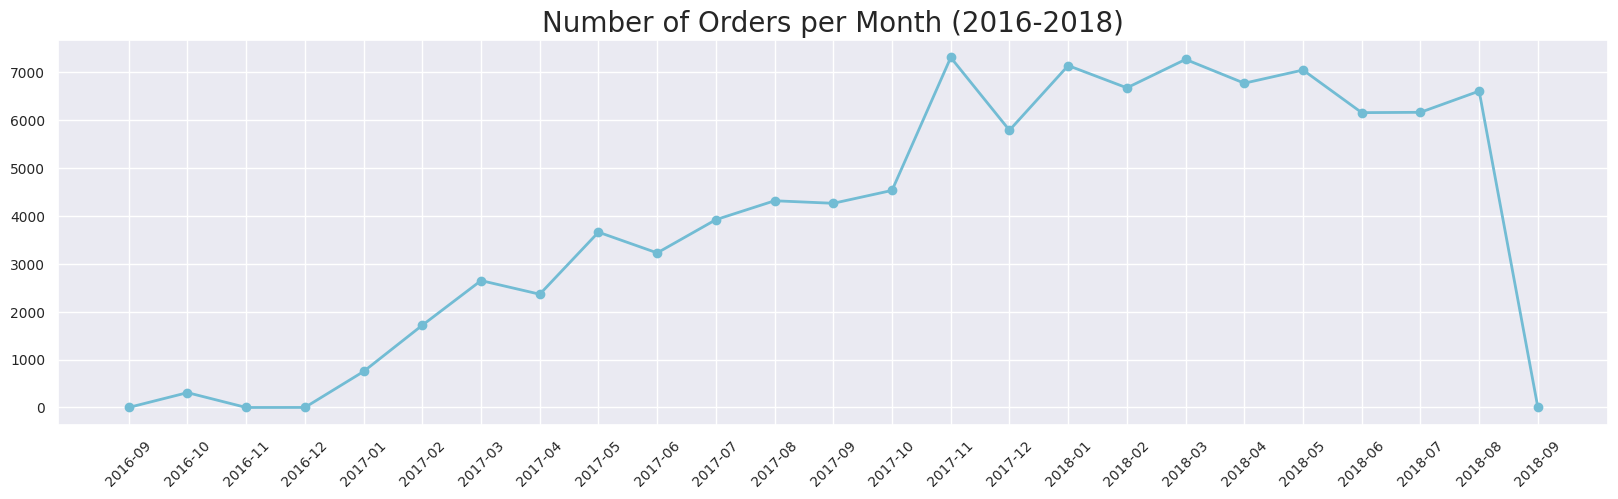

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

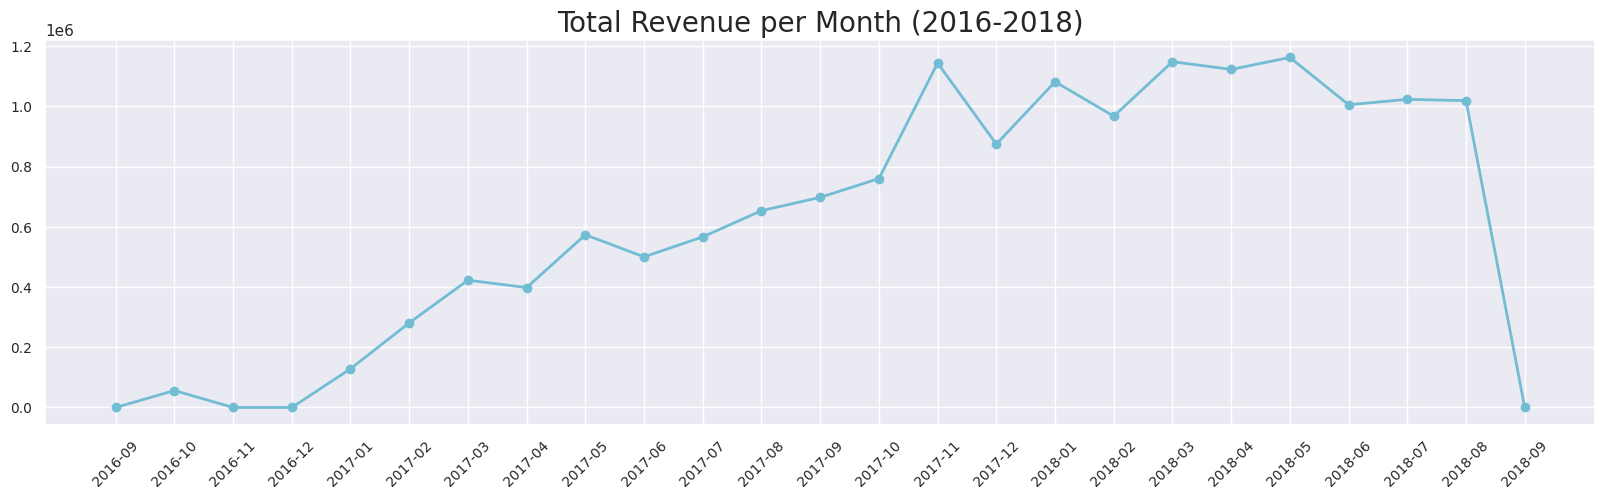

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Meskipun fluktuatif, secara umum, jumlah pesanan mengalami peningkatan dalam 3 tahun terakhir sebanyak 7309 pesanan. Puncaknya berada di bulan November 2017. Setelah ditelusuri, November 2017 adalah bulan ketika diskon sedang pada puncaknya.
- Begitu pula dengan revenue perusahaan, revenue perusahaan terus meningkat dalam 3 tahun terakhir hingga memuncak pada november 2017 dengan nominal 1143633.57

### Pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit terjual?

In [ ]:
sum_order_items_df = all_df.groupby('product_category_name_english').order_item_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    'product_category_name_english': 'product_category',
    'order_item_id' : 'quantity'
}, inplace=True)
sum_order_items_df

,product_category,quantity
0,bed_bath_table,11988
1,health_beauty,10032
2,sports_leisure,9004
3,furniture_decor,8832
4,computers_accessories,8150
...,...,...
69,portable_kitchen_food_preparers,15
70,cds_dvds_musicals,14
71,gaming_pc,10
72,fashion_childrens_clothes,8


<ipython-input-262-7c0a040f0422>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-262-7c0a040f0422>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])


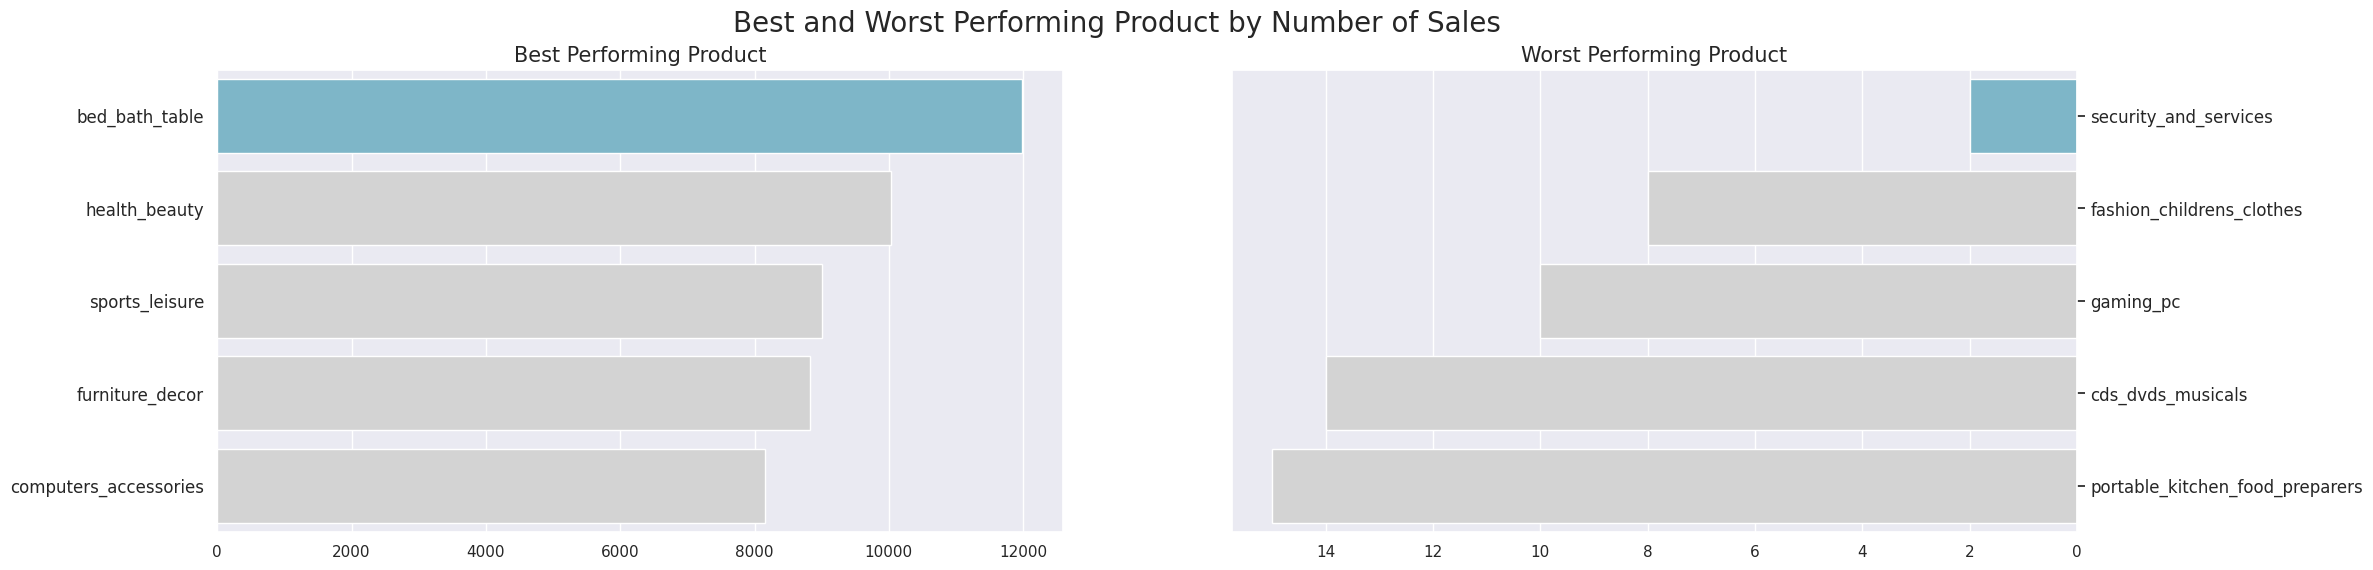

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**
- Kategori produk yang paling banyak terjual adalah bed bath table sebanyak 11988 item.
- Sedangkan kategori produk yang paling sedikit terjualah adalah security and services dengan item terjual sebanyak 2 item.

### Pertanyaan 3: Bagaimana kontribusi setiap metode pembayaran terhadap total penjualan?

In [ ]:
all_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,75991
boleto,19614
voucher,3766
debit_card,1521


In [ ]:
payment_data = all_df.groupby('payment_type').payment_value.sum().sort_values(ascending=False)
payment_data

,payment_value
payment_type,
credit_card,15669475.07
boleto,4083687.96
voucher,409188.68
debit_card,254490.83


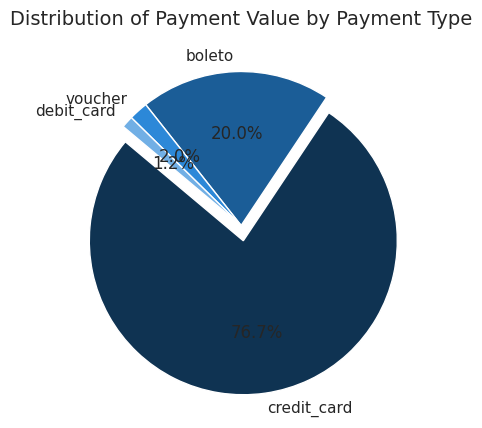

In [ ]:
# Normalize the data for color intensity
colors = ('#0f3352', '#1b5d97', '#2c88d8', '#71afe5')  # Blues colormap
explode = (0.1, 0, 0, 0)

# Membuat pie chart
plt.figure(figsize=(5, 5))  # Ukuran grafik
plt.pie(
    payment_data,
    labels=payment_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode
)

# Menambahkan judul
plt.title('Distribution of Payment Value by Payment Type', fontsize=14)
plt.show()

**Insight:**
- Tiga jenis pembayaran yang paling sering digunakan oleh customer adalah credit card, boleto, dan voucher.
- Credit card menyumbang revenue perusahaan terbesar sebanyak 78,3%. Sedangkan Boleto dan voucher masing-masing sebesar 17,9% dan 2,4%.

### Pertanyaan 4: Berapa proporsi pesanan yang berhasil dikirim tepat waktu?

In [ ]:
delivery_data = all_df.loc[all_df['order_status'] == 'delivered'].copy()
delivery_data = delivery_data.dropna(subset=['on_time_delivery'])
delivery_data['delivery_group'] = delivery_data.on_time_delivery.apply(lambda x: "on time" if x >=0 else ("late" if x < 0 else "process"))
delivery_data.groupby(by="delivery_group").order_id.nunique().sort_values(ascending=False)

<ipython-input-143-3f9f8b52ca8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_data['delivery_group'] = delivery_data.on_time_delivery.apply(lambda x: "on time" if x >=0 else ("late" if x < 0 else "process"))


,order_id
delivery_group,
on time,88825
late,7645


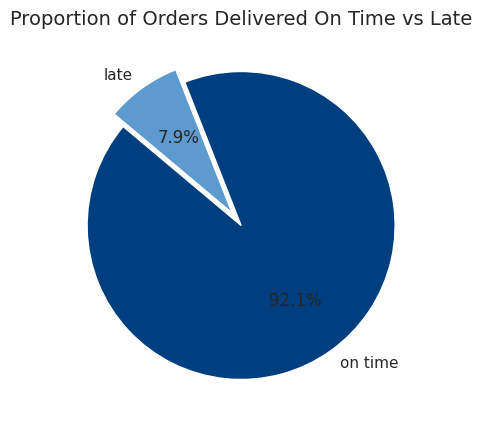

In [ ]:
delivery_status = delivery_data.groupby(by="delivery_group").order_id.nunique().sort_values(ascending=False)

# Membuat pie chart
plt.figure(figsize=(5, 5))  # Ukuran grafik
plt.pie(
    delivery_status,
    labels=delivery_status.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#003f7f', '#5d9bcf'],
    explode=[0, 0.1]
)

# Menambahkan judul
plt.title('Proportion of Orders Delivered On Time vs Late', fontsize=14)
plt.show()

**Insight:**
- Berdasarkan ketepatan waktu pengiriman barang, perusahaan olist memiliki performa yang sangat baik dengan capaian tepat waktu 92,1%.

### Pertanyaan 5: Bagaimana demografi pelanggan yang kita miliki?

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


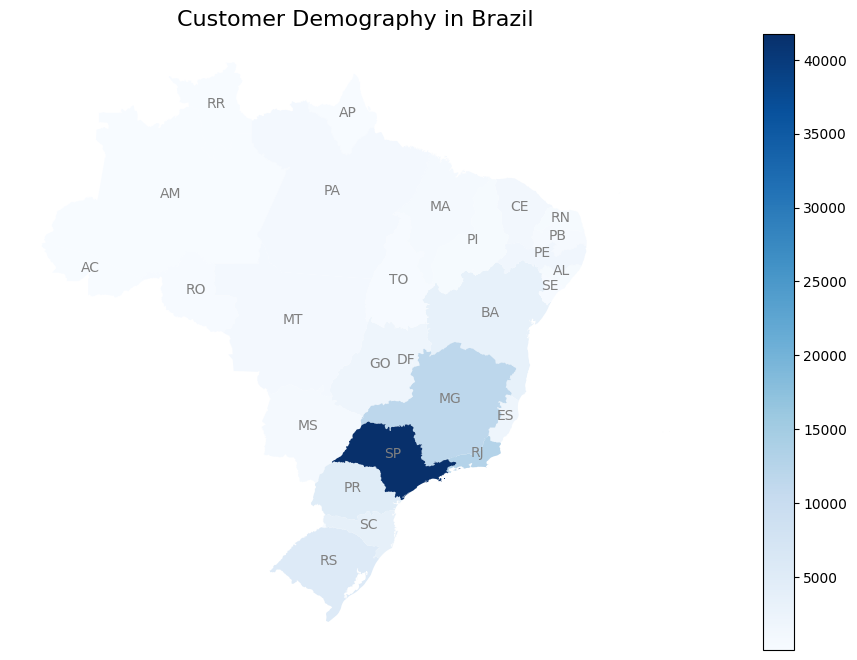

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Unduh data shapefile peta Brasil
gdf = gpd.read_file('brazil_geo.json')

# 2. Data pelanggan (contoh sederhana)
customer_data = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

# 3. Gabungkan data pelanggan dengan data geografis
# Kolom untuk join di data geografis biasanya `sigla` (kode negara bagian Brasil)
gdf = gdf.merge(customer_data, left_on='id', right_on='customer_state', how='left')

# 4. Plot peta
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
gdf.plot(column='customer_id', cmap='Blues', legend=True, ax=ax)

# Tambahkan detail peta
ax.set_title('Customer Demography in Brazil', fontsize=16)
ax.axis('off')  # Hilangkan sumbu

# Menambahkan label untuk 'customer_state'
for idx, row in gdf.iterrows():
    # Ambil koordinat tengah negara bagian (centroid)
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, row['id'], fontsize=10, ha='center', color='grey')

plt.show()


**Insight:**
- Peta menunjukkan bahwa demografi pelanggan tersebar di seluruh negara Brazil, namun pelanggan terbanyak perusahaan terpusat di bagian tenggara Brazil.
- Negara dengan pelanggan paling banyak adalah Sao Paolo dengan 41.746 pelanggan. Kemudian Rio de Janeiro sebanyak 12852 pelanggan. Lalu disusul oleh Minas Gerais sebanyak 11635 pelanggan.

## Analisis Lanjutan RFM

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


<ipython-input-270-1dad10f7ccf6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-270-1dad10f7ccf6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-270-1dad10f7ccf6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

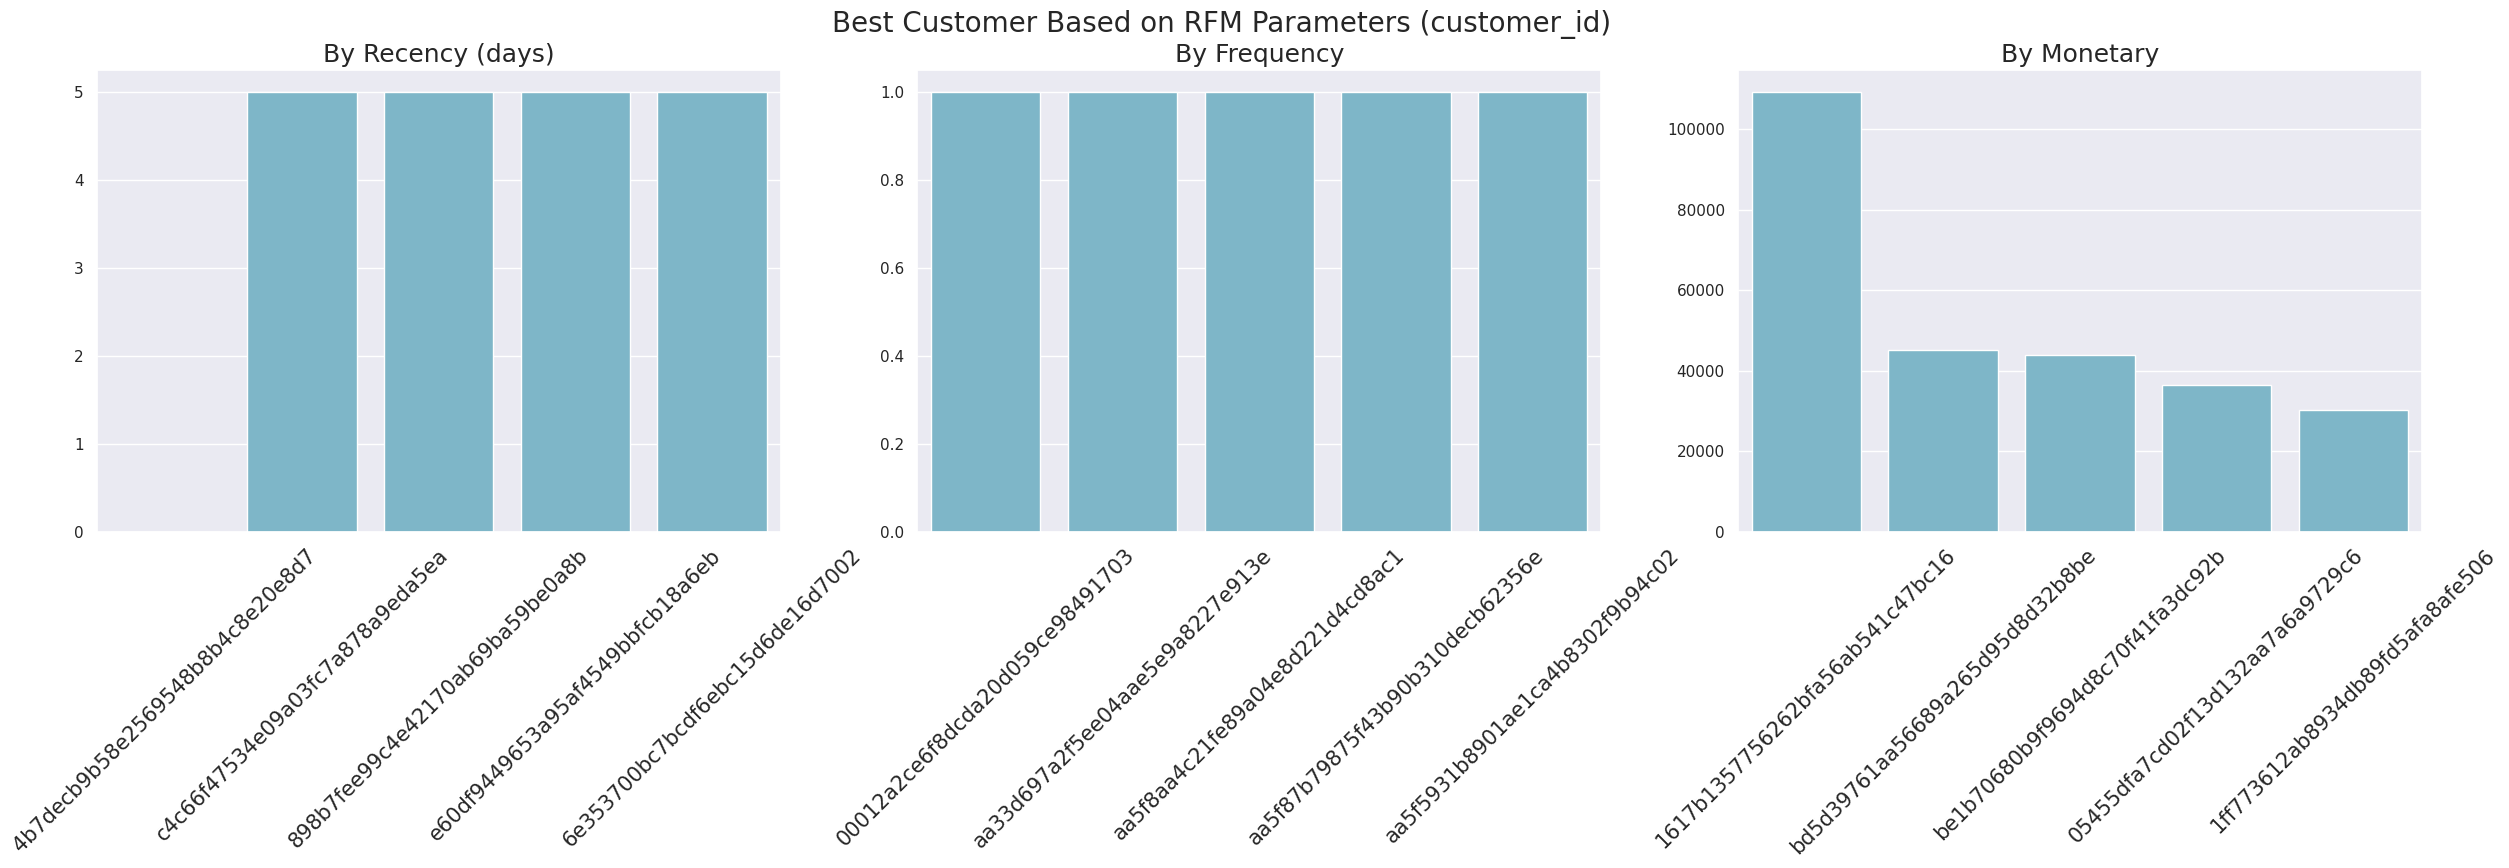

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=45)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**


Dari visualisasi data di atas, kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter Recency-Frequency-Monetary.
- Berdasarkan Recency (terakhir kali transaksi): dengan customer_id 4b7decb958e21569548bb4ce820e8d7, c4c66f47534e09203fc7a879aed45ea, 898b71ee99c4e42170ab69ba59be0a8b, e0df04946533a95af4549b6fc18a6eb, dan 6e357100bc7bcdfebc15dde16d7002
- Berdasarkan Frequency (banyaknya pesanan): dengan customer_id 00012c26f86dcad2d095cee84917103, aa33d697a75ee04aae5ea88227e913e, aa5f88ac421fe89048e02124dc8ac1, aa5f817b975f439b09310edcb6255e6, dan aa5f9331b8901ae1ca48302fb904c2
- Berdasarkan Monetary (jumlah uang yang dikeluarkan): dengan customer_id 1617b357175626f5a5b314c71b1c16,
bd539761aa56689a256d895d832b86e,
be1b70680b969048c70641f3d3cc92b,
05455dfa7cd0f2130122a7a68972296, dan
1f773612ab8934db895fa8faafe506.

Dari ketiganya, tidak ada customer yang dikategorikan terbaik berdasarkan ketiga kategori RFM.

## Conclusion

- Secara umum, jumlah pesanan dan revenue perusahaan mengalami peningkatan dalam 3 tahun terakhir. Puncaknya berada di bulan November 2017 dengan jumlah pesanan sebanyak 7309 dan revenue 1.143.633,57 Real.
- Kategori produk yang paling banyak terjual adalah bed bath table sebanyak 11988 item. Sedangkan kategori produk yang paling sedikit terjualah adalah security and services dengan item terjual sebanyak 2 item.
- Tiga jenis pembayaran yang paling sering digunakan oleh customer adalah credit card, boleto, dan voucher. Credit card menyumbang revenue perusahaan terbesar sebanyak 78,3%. Sedangkan Boleto dan voucher masing-masing sebesar 17,9% dan 2,4%.
- Perusahaan olist memiliki performa yang sangat baik dengan proporsi pengiriman pesanan tepat waktu sebesar 92,1%.
- Demografi pelanggan terbanyak perusahaan terpusat di bagian tenggara Brazil, yaitu Sao Paolo dan sekitarnya.